In [61]:
# Load dataset
import pandas as pd
from pathlib import Path

# File path
DATA_PATH = Path("Loandata.csv")

# Load CSV
df = pd.read_csv(DATA_PATH)

# Standardize column names: strip whitespace, lowercase, replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Basic overview
print("Shape of dataset:", df.shape)
print("\nColumn names and types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())


Shape of dataset: (614, 13)

Column names and types:
 loan_id               object
gender                object
married               object
dependents            object
education             object
self_employed         object
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status           object
dtype: object

First 5 rows:
     loan_id gender married dependents     education self_employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   applicantincome  coapplicantincome  loanamount  loan_amount_term  \
0             5849                0.0         NaN    

In [62]:
# Count missing values per column
missing_count = df.isna().sum()

# Percentage of missing values
missing_percent = (missing_count / len(df) * 100).round(2)

# Combine into a single table for reporting
missing_df = pd.DataFrame({
    'missing_count': missing_count,
    'missing_percent': missing_percent
}).sort_values(by='missing_percent', ascending=False)

missing_df


,missing_count,missing_percent
credit_history,50,8.14
self_employed,32,5.21
loanamount,22,3.58
dependents,15,2.44
loan_amount_term,14,2.28
gender,13,2.12
married,3,0.49
education,0,0.00
loan_id,0,0.00
coapplicantincome,0,0.00


In [63]:
#  Handle Missing Values

# Categorical columns – fill missing with mode
categorical_cols = ['gender', 'married', 'dependents', 'self_employed']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

#  Numerical columns – fill missing with median
numerical_cols = ['loanamount', 'loan_amount_term']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Credit_History (0 or 1) – fill missing with mode
df['credit_history'].fillna(df['credit_history'].mode()[0], inplace=True)

#  Verification 
missing_df_post = pd.DataFrame({
    'column': df.columns,
    'missing_count': df.isna().sum(),
    'missing_percent': (df.isna().sum() / len(df) * 100).round(2)
}).sort_values(by='missing_percent', ascending=False)

missing_df_post


C:\Users\DELL\AppData\Local\Temp\ipykernel_1936\3781897084.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_1936\3781897084.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

,column,missing_count,missing_percent
loan_id,loan_id,0,0.0
gender,gender,0,0.0
married,married,0,0.0
dependents,dependents,0,0.0
education,education,0,0.0
self_employed,self_employed,0,0.0
applicantincome,applicantincome,0,0.0
coapplicantincome,coapplicantincome,0,0.0
loanamount,loanamount,0,0.0
loan_amount_term,loan_amount_term,0,0.0


C:\Users\DELL\AppData\Local\Temp\ipykernel_1936\2386605009.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='loan_status', palette='Set2')


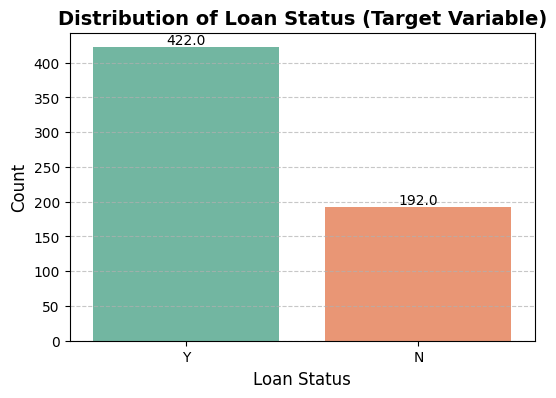


Percentage Distribution of Loan Status:
loan_status
Y    68.73
N    31.27
Name: proportion, dtype: float64


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='loan_status', palette='Set2')

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

# Titles & Labels
plt.title("Distribution of Loan Status (Target Variable)", fontsize=14, weight='bold')
plt.xlabel("Loan Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate & display percentages
loan_status_dist = df['loan_status'].value_counts(normalize=True) * 100
print("\nPercentage Distribution of Loan Status:")
print(loan_status_dist.round(2))


C:\Users\DELL\AppData\Local\Temp\ipykernel_1936\246737524.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='gender', palette='Set2')


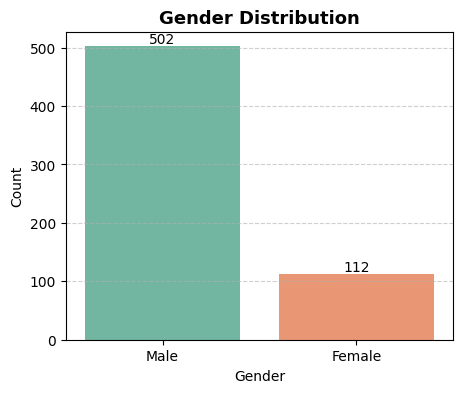

loan_status,Rejected_%,Approved_%
gender,,
Female,33.04,66.96
Male,30.88,69.12


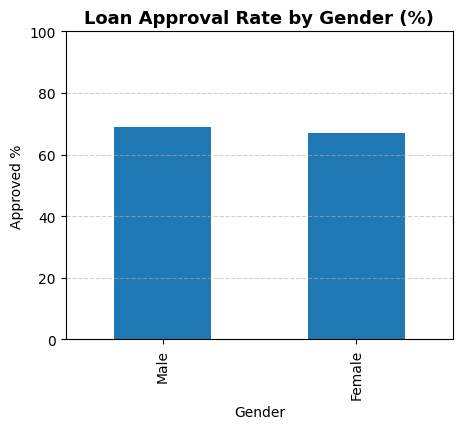

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#  Frequency of each category
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df, x='gender', palette='Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.title('Gender Distribution', fontsize=13, weight='bold')
plt.xlabel('Gender'); plt.ylabel('Count'); plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Approval rate by category 
approval_rate_gender = (
    pd.crosstab(df['gender'], df['loan_status'], normalize='index') * 100
).round(2).rename(columns={'Y':'Approved_%','N':'Rejected_%'})
display(approval_rate_gender)

# 3) Bar chart of approval rate 
plt.figure(figsize=(5,4))
(approval_rate_gender['Approved_%']
 .sort_values(ascending=False)
 .plot(kind='bar'))
plt.title('Loan Approval Rate by Gender (%)', fontsize=13, weight='bold')
plt.xlabel('Gender'); plt.ylabel('Approved %')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(0, 100)
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_1936\4134621588.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='married', palette='Set2')


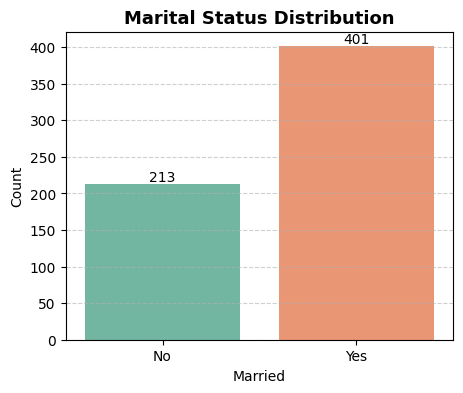

loan_status,Rejected_%,Approved_%
married,,
No,37.09,62.91
Yes,28.18,71.82


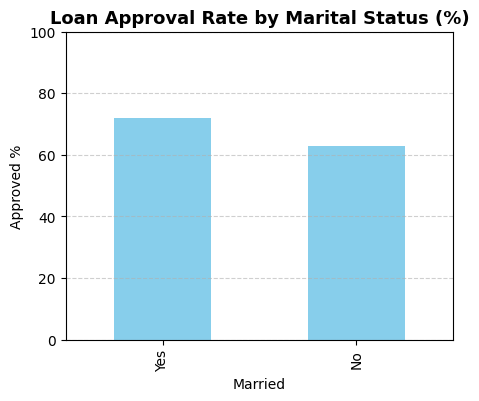

In [66]:
#  Frequency of each category
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df, x='married', palette='Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.title('Marital Status Distribution', fontsize=13, weight='bold')
plt.xlabel('Married'); plt.ylabel('Count'); plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#  Approval rate by category
approval_rate_married = (
    pd.crosstab(df['married'], df['loan_status'], normalize='index') * 100
).round(2).rename(columns={'Y':'Approved_%','N':'Rejected_%'})
display(approval_rate_married)

# Bar chart of approval rate
plt.figure(figsize=(5,4))
(approval_rate_married['Approved_%']
 .sort_values(ascending=False)
 .plot(kind='bar', color='skyblue'))
plt.title('Loan Approval Rate by Marital Status (%)', fontsize=13, weight='bold')
plt.xlabel('Married'); plt.ylabel('Approved %')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ylim(0, 100)
plt.show()


In [67]:
def categorical_eda(df, feature, target='loan_status'):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    
    print(f"--- EDA for {feature} ---\n")
    
    #  Countplot
    plt.figure(figsize=(5,4))
    ax = sns.countplot(data=df, x=feature, palette='Set2')
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width()/2, p.get_height()),
                    ha='center', va='bottom', fontsize=10)
    plt.title(f'{feature} Distribution', fontsize=13, weight='bold')
    plt.xlabel(feature); plt.ylabel('Count'); plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()
    
    #  Approval rate table
    approval_rate = (
        pd.crosstab(df[feature], df[target], normalize='index') * 100
    ).round(2).rename(columns={'Y':'Approved_%','N':'Rejected_%'})
    display(approval_rate)
    
    #  Bar chart of approval %
    plt.figure(figsize=(5,4))
    (approval_rate['Approved_%']
     .sort_values(ascending=False)
     .plot(kind='bar', color='skyblue'))
    plt.title(f'Loan Approval Rate by {feature} (%)', fontsize=13, weight='bold')
    plt.xlabel(feature); plt.ylabel('Approved %')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.ylim(0, 100)
    plt.show()


--- EDA for education ---



C:\Users\DELL\AppData\Local\Temp\ipykernel_1936\37481350.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='Set2')


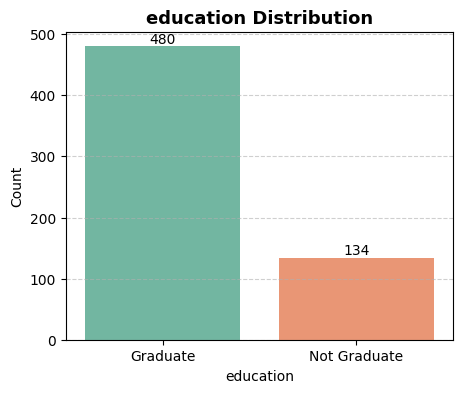

loan_status,Rejected_%,Approved_%
education,,
Graduate,29.17,70.83
Not Graduate,38.81,61.19


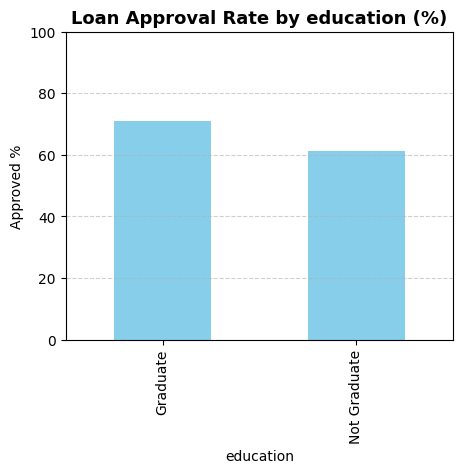

--- EDA for self_employed ---



C:\Users\DELL\AppData\Local\Temp\ipykernel_1936\37481350.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='Set2')


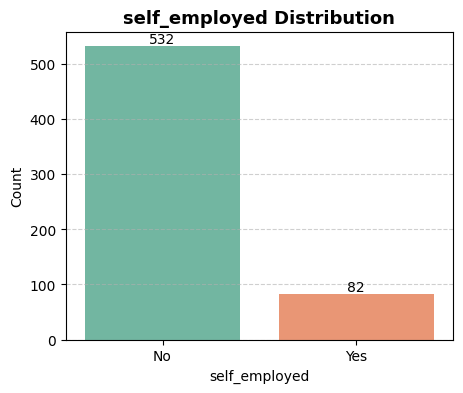

loan_status,Rejected_%,Approved_%
self_employed,,
No,31.20,68.80
Yes,31.71,68.29


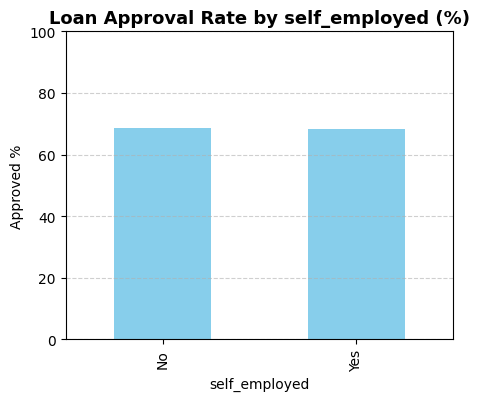

--- EDA for property_area ---



C:\Users\DELL\AppData\Local\Temp\ipykernel_1936\37481350.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='Set2')


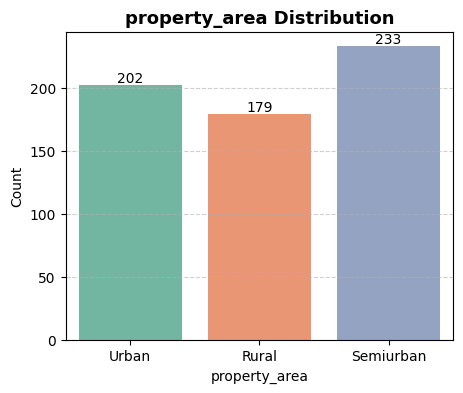

loan_status,Rejected_%,Approved_%
property_area,,
Rural,38.55,61.45
Semiurban,23.18,76.82
Urban,34.16,65.84


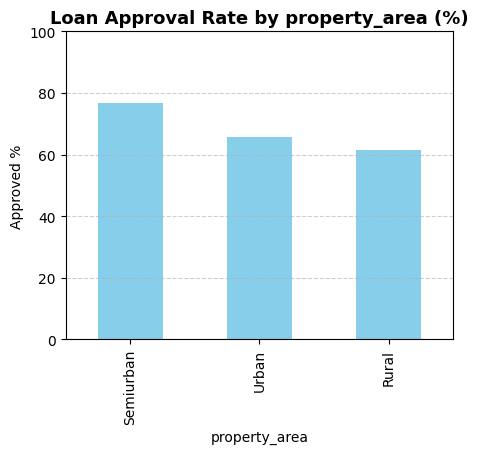

In [68]:
categorical_features = ['education', 'self_employed', 'property_area']
for col in categorical_features:
    categorical_eda(df, col)


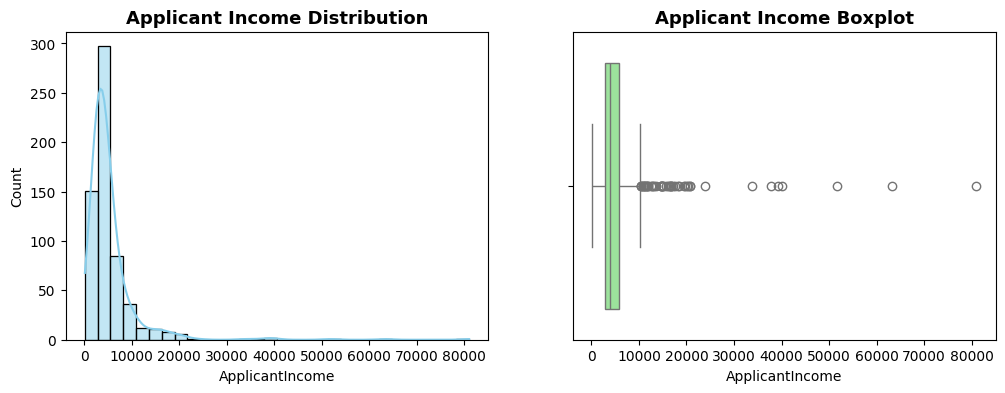

count      614.00
mean      5403.46
std       6109.04
min        150.00
25%       2877.50
50%       3812.50
75%       5795.00
max      81000.00
skew         6.54
Name: applicantincome, dtype: float64

In [69]:
# Histogram & boxplot for ApplicantIncome
plt.figure(figsize=(12,4))

# Histogram
plt.subplot(1,2,1)
sns.histplot(df['applicantincome'], bins=30, kde=True, color='skyblue')
plt.title('Applicant Income Distribution', fontsize=13, weight='bold')
plt.xlabel('ApplicantIncome'); plt.ylabel('Count')

# Boxplot to detect outliers
plt.subplot(1,2,2)
sns.boxplot(x=df['applicantincome'], color='lightgreen')
plt.title('Applicant Income Boxplot', fontsize=13, weight='bold')
plt.xlabel('ApplicantIncome')

plt.show()

# Summary statistics
applicant_income_stats = df['applicantincome'].describe().round(2)
applicant_income_stats['skew'] = df['applicantincome'].skew().round(2)
applicant_income_stats


In [70]:
import numpy as np
# Outlier Capping at 99th percentile
upper_limit = df['applicantincome'].quantile(0.99)
df['applicantincome'] = np.where(df['applicantincome'] > upper_limit,
                                 upper_limit,
                                 df['applicantincome'])


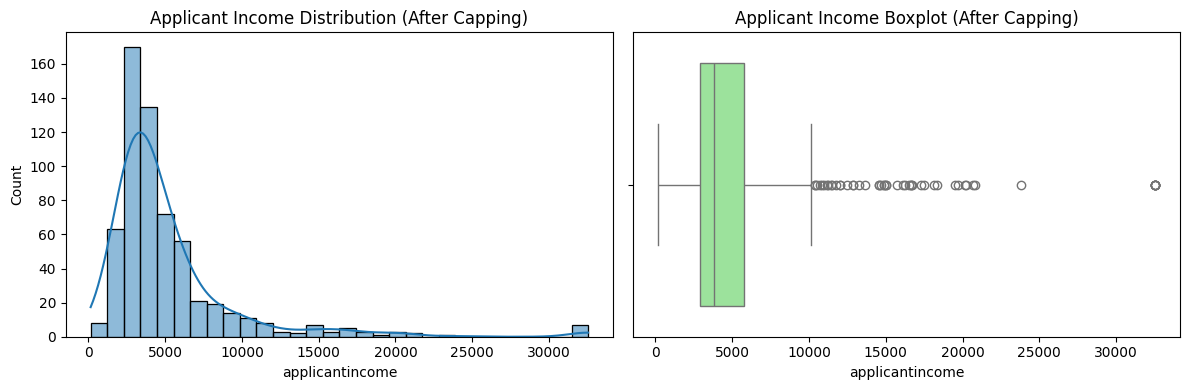

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution after capping
sns.histplot(df['applicantincome'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Applicant Income Distribution (After Capping)")

# Boxplot after capping
sns.boxplot(x=df['applicantincome'], color='lightgreen', ax=axes[1])
axes[1].set_title("Applicant Income Boxplot (After Capping)")

plt.tight_layout()
plt.show()


In [72]:
print("Skewness after capping:", df['applicantincome'].skew())


Skewness after capping: 3.433729095160324


skewness is still high (3.20 > 2), we should apply a log transformation to reduce it.

In [73]:
df['applicantincome_log'] = np.log1p(df['applicantincome'])  # log1p handles zeros safely


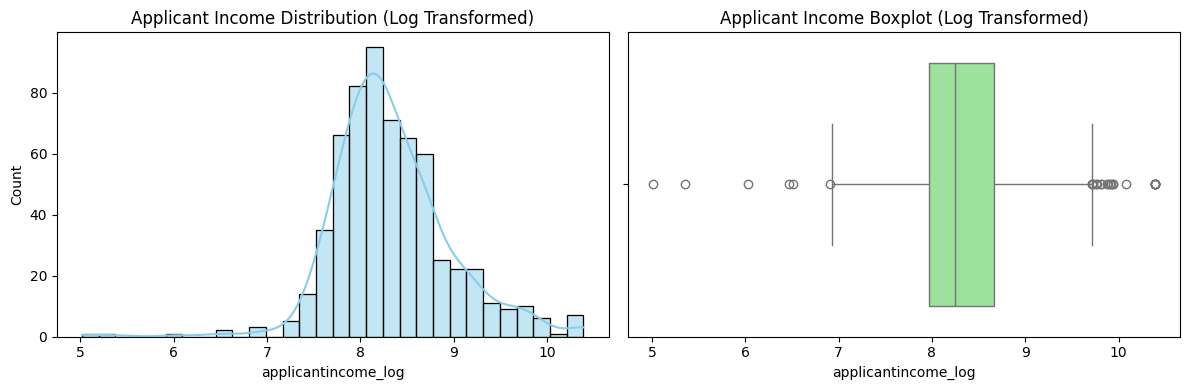

Skewness after log transform: 0.2510878450152314


In [74]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['applicantincome_log'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Applicant Income Distribution (Log Transformed)")

sns.boxplot(x=df['applicantincome_log'], color='lightgreen', ax=axes[1])
axes[1].set_title("Applicant Income Boxplot (Log Transformed)")

plt.tight_layout()
plt.show()

print("Skewness after log transform:", df['applicantincome_log'].skew())


Summary Statistics:
 count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: coapplicantincome, dtype: float64

Skewness: 7.491531216657306


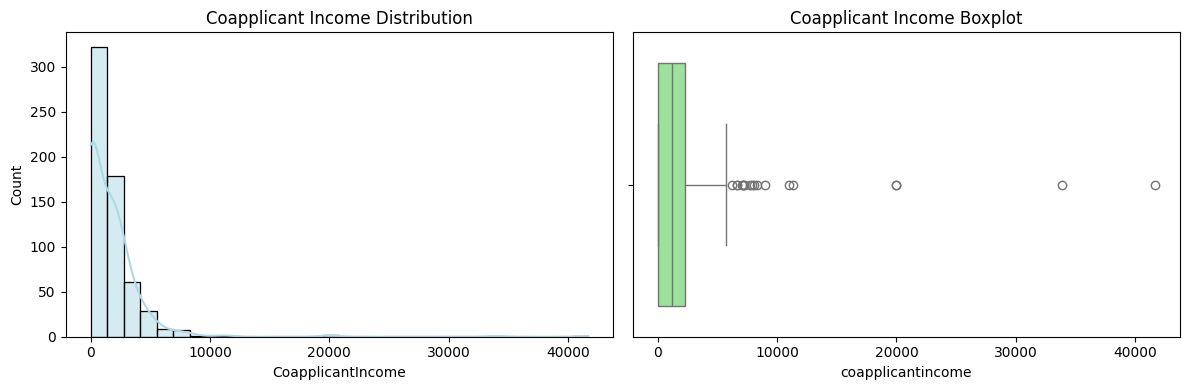

In [75]:
# Summary Statistics & Skewness
coapp_summary = df['coapplicantincome'].describe()
coapp_skewness = df['coapplicantincome'].skew()

print("Summary Statistics:\n", coapp_summary)
print("\nSkewness:", coapp_skewness)

#  Visualization 
plt.figure(figsize=(12,4))

# Histogram & KDE
plt.subplot(1,2,1)
sns.histplot(df['coapplicantincome'], bins=30, kde=True, color='lightblue')
plt.title('Coapplicant Income Distribution')
plt.xlabel('CoapplicantIncome')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=df['coapplicantincome'], color='lightgreen')
plt.title('Coapplicant Income Boxplot')

plt.tight_layout()
plt.show()


Skewness after log transform: -0.18051090922586283


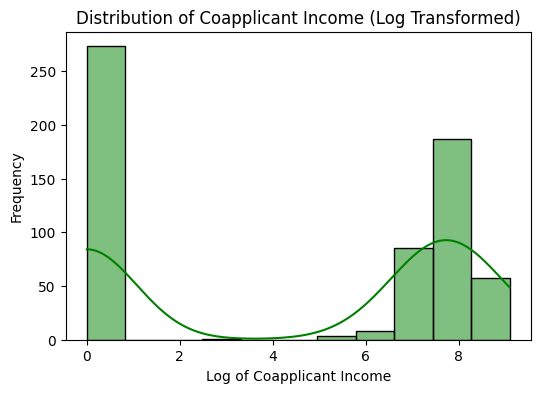

In [76]:
import numpy as np

# Cap outliers at 99th percentile
upper_limit = df['coapplicantincome'].quantile(0.99)
df['coapplicantincome'] = np.where(
    df['coapplicantincome'] > upper_limit,
    upper_limit,
    df['coapplicantincome']
)

# Apply log1p transformation (handles zeros better)
df['coapplicantincome_log'] = np.log1p(df['coapplicantincome'])

# Check skewness again
new_skew = df['coapplicantincome_log'].skew()
print(f"Skewness after log transform: {new_skew}")

# Plot distribution after transformation
plt.figure(figsize=(6, 4))
sns.histplot(df['coapplicantincome_log'], kde=True, color='green')
plt.title('Distribution of Coapplicant Income (Log Transformed)')
plt.xlabel('Log of Coapplicant Income')
plt.ylabel('Frequency')
plt.show()


count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: loanamount, dtype: float64

Skewness: 2.743052748820892


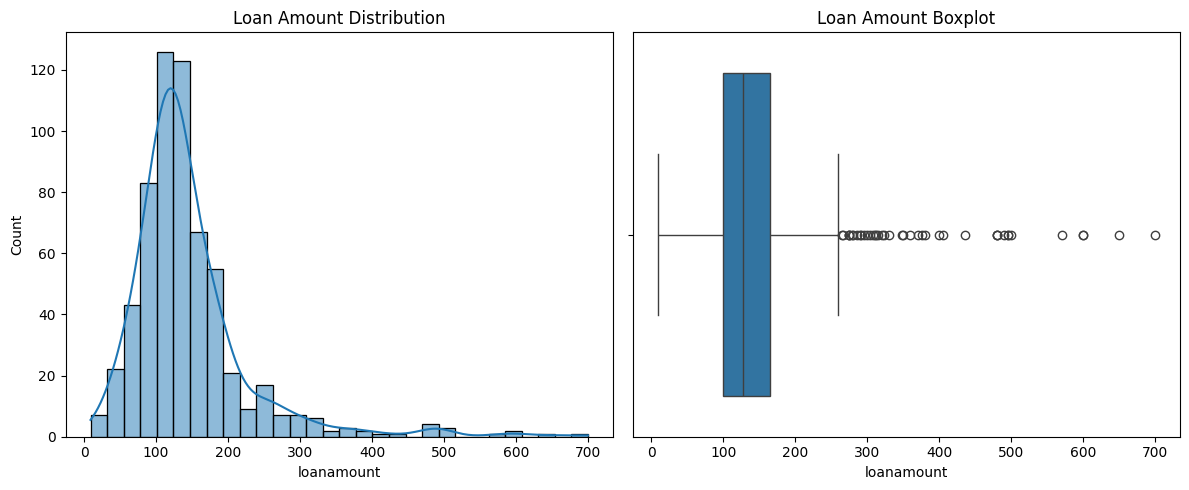

In [77]:
# Summary statistics for loan amount
print(df['loanamount'].describe())
print("\nSkewness:", df['loanamount'].skew())

# Visualization
plt.figure(figsize=(12,5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['loanamount'], kde=True, bins=30)
plt.title('Loan Amount Distribution')

# Boxplot (to detect outliers)
plt.subplot(1, 2, 2)
sns.boxplot(x=df['loanamount'])
plt.title('Loan Amount Boxplot')

plt.tight_layout()
plt.show()


In [78]:
upper_limit = df['loanamount'].quantile(0.99)

# Capping outliers
df['loanamount'] = np.where(df['loanamount'] > upper_limit,
                            upper_limit,
                            df['loanamount'])

print("Skewness after capping:", df['loanamount'].skew())


Skewness after capping: 2.220137579767308


In [79]:
# Apply log transformation 
df['loanamount_log'] = np.log1p(df['loanamount'])

print("Skewness after log transform:", df['loanamount_log'].skew())


Skewness after log transform: -0.25126485186969155


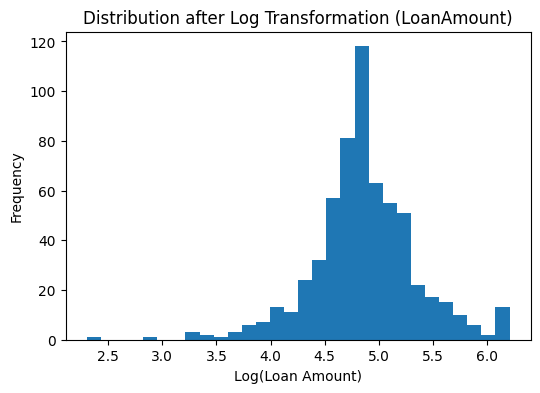

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df['loanamount_log'], bins=30)
plt.title("Distribution after Log Transformation (LoanAmount)")
plt.xlabel("Log(Loan Amount)")
plt.ylabel("Frequency")
plt.show()


Rural is the base category, dropped to avoid dummy variable trap

In [81]:
from sklearn.preprocessing import LabelEncoder

# Encode binary categorical columns
label_enc_cols = ['gender', 'married', 'education', 'self_employed']
le = LabelEncoder()
for col in label_enc_cols:
    df[col] = le.fit_transform(df[col])

# One-Hot Encode multi-class categorical columns
df = pd.get_dummies(df, columns=['dependents', 'property_area'], drop_first=True)

# Encode target variable
df['loan_status'] = df['loan_status'].map({'Y': 1, 'N': 0})

# Check
print(df.head())


    loan_id  gender  married  education  self_employed  applicantincome  \
0  LP001002       1        0          0              0           5849.0   
1  LP001003       1        1          0              0           4583.0   
2  LP001005       1        1          0              1           3000.0   
3  LP001006       1        1          1              0           2583.0   
4  LP001008       1        0          0              0           6000.0   

   coapplicantincome  loanamount  loan_amount_term  credit_history  \
0                0.0       128.0             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   loan_status  applicantincome_log  coapplicantincome_log  loanamount_log  \
0            1             8.674197               

use Z-score scaling → mean = 0, std = 1

fit the scaler only on the training data and then apply the same transformation to the test set (to avoid "data leakage")

stratify=y ensures the same class ratio in both train and test.

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Feature & target
X = df.drop('loan_status', axis=1)  
y = df['loan_status']

# Train-test split first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numerical features (fit on train, transform on both)
num_features = ['applicantincome_log', 'coapplicantincome_log', 'loanamount_log', 'loan_amount_term']
scaler = StandardScaler()

X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (491, 18)
Test shape: (123, 18)


In [89]:
print(X_train.dtypes)


loan_id                     object
gender                       int64
married                      int64
education                    int64
self_employed                int64
applicantincome            float64
coapplicantincome          float64
loanamount                 float64
loan_amount_term           float64
credit_history             float64
applicantincome_log        float64
coapplicantincome_log      float64
loanamount_log             float64
dependents_1                  bool
dependents_2                  bool
dependents_3+                 bool
property_area_Semiurban       bool
property_area_Urban           bool
dtype: object


loan_id is just an identifier (not useful for prediction), we should drop it from the features.

In [90]:
# Drop loan_id
X_train = X_train.drop('loan_id', axis=1)
X_test = X_test.drop('loan_id', axis=1)

#  convert boolean columns to int (0/1)
bool_cols = X_train.select_dtypes(include=['bool']).columns
X_train[bool_cols] = X_train[bool_cols].astype(int)
X_test[bool_cols] = X_test[bool_cols].astype(int)


In [91]:
print(X_train.dtypes)


gender                       int64
married                      int64
education                    int64
self_employed                int64
applicantincome            float64
coapplicantincome          float64
loanamount                 float64
loan_amount_term           float64
credit_history             float64
applicantincome_log        float64
coapplicantincome_log      float64
loanamount_log             float64
dependents_1                 int64
dependents_2                 int64
dependents_3+                int64
property_area_Semiurban      int64
property_area_Urban          int64
dtype: object


In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8617886178861789

Confusion Matrix:
 [[22 16]
 [ 1 84]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



c:\Users\DELL\.conda\envs\basics\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy ≈ 85% – good baseline.

Issue: Class 0 (Not Eligible) recall is low (58%) → many false negatives
Logistic Regression tends to favor majority class.

In [94]:
df['loan_status'].value_counts()


loan_status
1    422
0    192
Name: count, dtype: int64

In [96]:
#Feature Importance
coefficients = log_reg.coef_[0]
features = X_train.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(importance_df.head(10))   # Top positive influence
print(importance_df.tail(10))   # Top negative influence


                    Feature  Coefficient
8            credit_history     3.148534
15  property_area_Semiurban     0.763396
10    coapplicantincome_log     0.485816
1                   married     0.406173
13             dependents_2     0.365458
14            dependents_3+     0.291086
16      property_area_Urban     0.172483
11           loanamount_log     0.101488
4           applicantincome     0.000033
5         coapplicantincome    -0.000203
                Feature  Coefficient
11       loanamount_log     0.101488
4       applicantincome     0.000033
5     coapplicantincome    -0.000203
6            loanamount    -0.002660
9   applicantincome_log    -0.033427
7      loan_amount_term    -0.040195
3         self_employed    -0.118148
12         dependents_1    -0.310126
0                gender    -0.311488
2             education    -0.437088


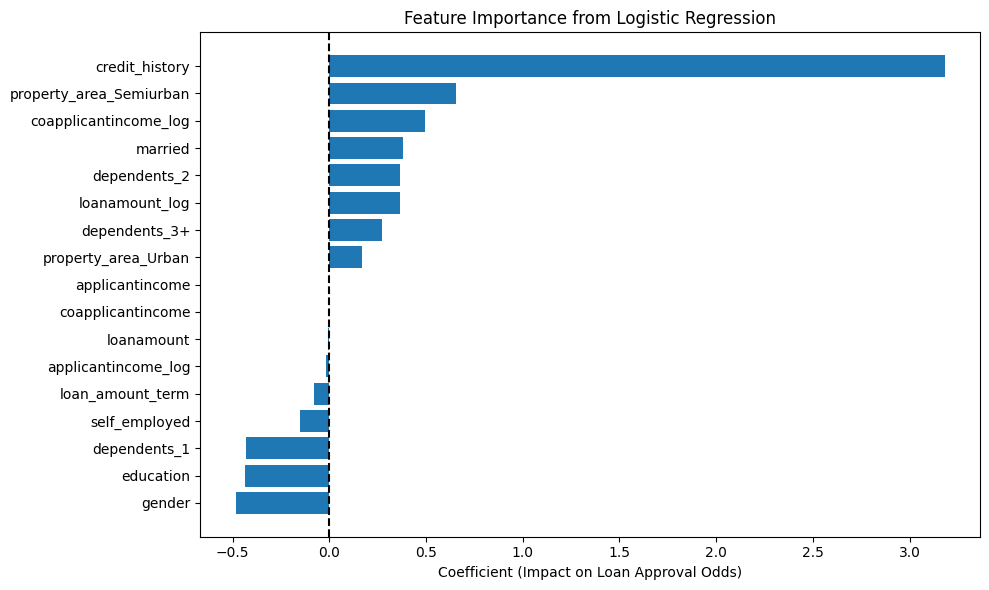

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine your feature and coefficient data into a DataFrame
feature_importance = pd.DataFrame({
    'Feature': [
        'credit_history', 'property_area_Semiurban', 'coapplicantincome_log',
        'married', 'dependents_2', 'loanamount_log', 'dependents_3+',
        'property_area_Urban', 'applicantincome', 'coapplicantincome',
        'loanamount', 'applicantincome_log', 'loan_amount_term',
        'self_employed', 'dependents_1', 'education', 'gender'
    ],
    'Coefficient': [
        3.180854, 0.655227, 0.496064, 0.378707, 0.366854, 0.366037, 
        0.269960, 0.166920, 0.000039, -0.000203, -0.005677, -0.015445,
        -0.079336, -0.152212, -0.428407, -0.435995, -0.484943
    ]
})

# Sort by coefficient
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel("Coefficient (Impact on Loan Approval Odds)")
plt.title("Feature Importance from Logistic Regression")
plt.axvline(x=0, color='black', linestyle='--')  # reference line
plt.tight_layout()
plt.show()


recall for class 0 – should improve.

In [98]:
#Fixing Class Imbalance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train model with class balancing
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7967479674796748

Confusion Matrix:
 [[26 12]
 [13 72]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.68      0.68        38
           1       0.86      0.85      0.85        85

    accuracy                           0.80       123
   macro avg       0.76      0.77      0.76       123
weighted avg       0.80      0.80      0.80       123



c:\Users\DELL\.conda\envs\basics\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
import pandas as pd
coeffs = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coeffs)


                    Feature  Coefficient
8            credit_history     3.096978
15  property_area_Semiurban     0.703402
10    coapplicantincome_log     0.588517
11           loanamount_log     0.431057
1                   married     0.427133
13             dependents_2     0.360159
14            dependents_3+     0.250278
16      property_area_Urban     0.118875
4           applicantincome     0.000038
5         coapplicantincome    -0.000247
6                loanamount    -0.007482
9       applicantincome_log    -0.009693
7          loan_amount_term    -0.022393
3             self_employed    -0.144474
12             dependents_1    -0.480045
0                    gender    -0.497873
2                 education    -0.515905


Accuracy: 0.8617886178861789
Precision: 0.84
Recall: 0.9882352941176471
F1 Score: 0.9081081081081082
ROC-AUC: 0.8479876160990713


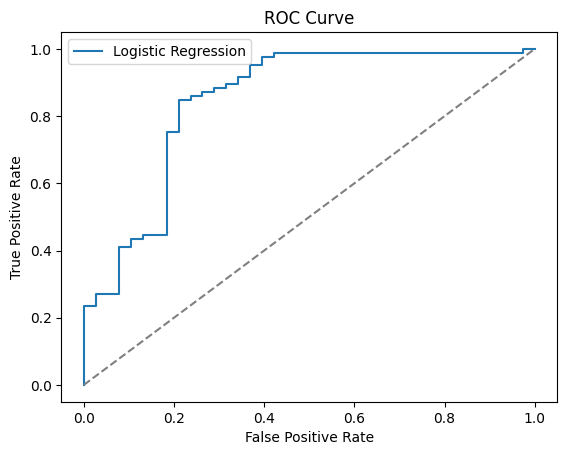

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predictions & Probabilities
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:,1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1], [0,1], linestyle="--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [101]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

# Metrics
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


Random Forest Accuracy: 0.8617886178861789
Precision: 0.8617021276595744
Recall: 0.9529411764705882
F1 Score: 0.9050279329608939
ROC-AUC: 0.8263157894736841


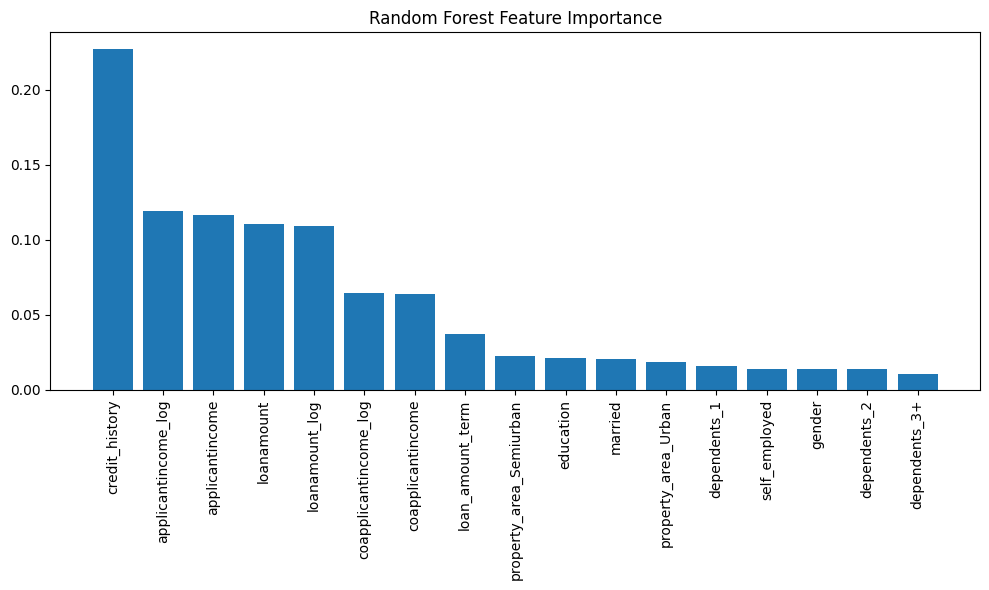

In [106]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]  # sort descending

# Plot
plt.figure(figsize=(10,6))
plt.title("Random Forest Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


In [102]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

# Metrics
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))


XGBoost Accuracy: 0.8373983739837398
Precision: 0.8494623655913979
Recall: 0.9294117647058824
F1 Score: 0.8876404494382022
ROC-AUC: 0.7959752321981425


c:\Users\DELL\.conda\envs\basics\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:53:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


<Figure size 1000x600 with 0 Axes>

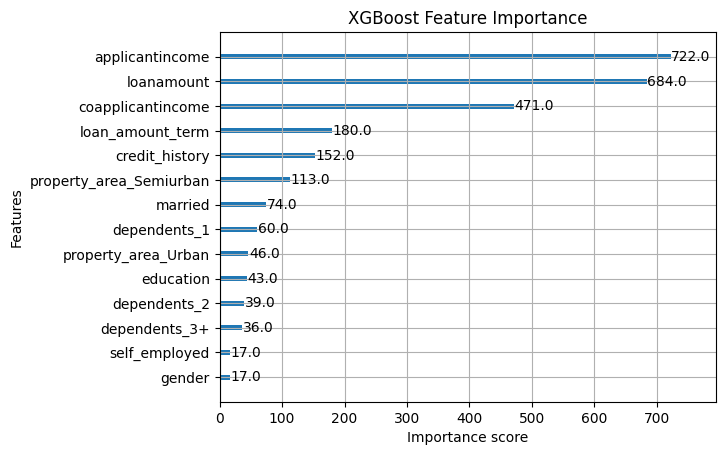

In [107]:
from xgboost import plot_importance

plt.figure(figsize=(10,6))
plot_importance(xgb, importance_type="weight")  # weight = frequency of use
plt.title("XGBoost Feature Importance")
plt.show()

In [103]:
import pandas as pd

results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "Precision": [
        precision_score(y_test, y_pred),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_xgb)
    ],
    "Recall": [
        recall_score(y_test, y_pred),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_xgb)
    ],
    "F1": [
        f1_score(y_test, y_pred),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_xgb)
    ]
}

df_results = pd.DataFrame(results)
print(df_results)


                 Model  Accuracy  Precision    Recall        F1   ROC-AUC
0  Logistic Regression  0.861789   0.840000  0.988235  0.908108  0.847988
1        Random Forest  0.861789   0.861702  0.952941  0.905028  0.826316
2              XGBoost  0.837398   0.849462  0.929412  0.887640  0.795975


In [109]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Create a dictionary to store fitted LabelEncoders
label_encoders = {}
label_enc_cols = ['gender', 'married', 'education', 'self_employed']

for col in label_enc_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # store the fitted encoder

# Save all LabelEncoders
joblib.dump(label_encoders, "label_encoders.pkl")


['label_encoders.pkl']

In [110]:
import joblib
import numpy as np
from sklearn.linear_model import LogisticRegression


#  Train the model
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)


#  Save the model
joblib.dump(log_reg, "model_rf.pkl")   # keep the same name so app.py works

#  Save the exact feature column order
feature_list = list(X_train.columns)
joblib.dump(feature_list, "feature_list.pkl")

#  Save preprocessing objects
preproc = {
    "log1p_cols": ["applicantincome", "coapplicantincome", "loanamount"],  # log-transformed cols
    "one_hot_keys": {
        "property_area": ["Semiurban", "Urban"]  # one-hot encoded property_area
    },
    "dependents_flags": ["1", "2", "3+"]  # one-hot encoded dependents
}

joblib.dump(preproc, "preproc_meta.pkl")


#  Save scaler and encoder
joblib.dump(scaler, "scaler.pkl")       # StandardScaler fitted on training data


print("✅ Saved: model_rf.pkl, feature_list.pkl, preproc_meta.pkl, scaler.pkl")


✅ Saved: model_rf.pkl, feature_list.pkl, preproc_meta.pkl, scaler.pkl


c:\Users\DELL\.conda\envs\basics\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
